# Tasca M4 T01 - Lista de ejercicios y guía de trabajo

## Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

Una variable categòrica (Districte o Barri) Una variable numèrica (Preu) Una variable numèrica i una categòrica (Districte i Preu) Dues variables numèriques (Any o Trimestre i Preu) Tres variables (Barri o Districte, Trimestre i Preu)

## Exercici 2 

Exporta els gràfics com imatges o com HTML.

## Exercici 3 

Proposa alguna visualització que creguis que pot resultar interessant.

# Ejercicio 1. Carga de datos y preprocesado

Para empezar, cargaremos los datos que se nos ha pedido analizar en un dataframe de Pandas. Aunque no se especifique en el enunciado, en un primer lugar echaremos un vistazo a los datos para observar que todo esté más o menos correcto.

In [2]:
# Cargamos los datos en un dataframe de pandas. 

import pandas as pd

barris = pd.read_csv('barri.csv')

print(barris.shape[0]) #Número de registros
print(barris.shape[1]) #Número de columnas
barris[:5] #Primeras 5 filas - Permite ver que hemos cargado bien los datos y el tipo de datos que tenemos

584
8


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


Observamos que estamos ante un número "manejable" de datos, así que no realizaremos ningún submuestreo. El fichero contiene datos de los precios de alquiler, desglosados por barrios, distritos y trimestres. Vamos a echar un ojo en más detalle

In [3]:
print(barris.isna().sum()) #Miramos si en alguna de las filas nos faltan datos - NAs
barris.info() #Miramos que tipo de datos tenemos en cada columna

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Aquí ya podemos ver algo que no termina de encajar: La columna "Preu" figura como "objeto", y no como tipo numérico (int, float). Es importante tener esto en cuenta, ya que de cara a graficar los datos y no tener ningún percance **convendría que la variable sea numérica**. En la primera visualización no hemos visto nada raro, así que miremos en detalle:

In [4]:
print(barris['Preu'][:25])
print(barris['Preu'].value_counts()['--'])

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
11        --
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
Name: Preu, dtype: object
44


Vemos que, aunque no tenemos ningún "NA" en nuestra base de datos, si que faltan algunos datos en la columna "Preu". En esos casos, se ha indicado con un doble guión. En total, 44 registros tienen doble guión en lugar de un número. **Esto hará imposible pasar esta columna a formato numérico**. Tampoco tiene sentido que estos registros sigan aquí, ya que no nos aportan información. Por tanto, **procedo a eliminar los registros que contienen "--"**

In [5]:
barris_new = barris.drop(barris[barris.Preu.str.contains(r'[-]')].index) #Eliminamos los registros que contienen doble guión

print(barris_new.shape[0]) #Comprobamos que se hayan borrado 44 registros
print(barris_new['Preu'][:25]) #Comprobamos que ahora no aparece el registro con doble guión

540
0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
Name: Preu, dtype: object


In [6]:
barris_new['Preu'] = barris_new['Preu'].astype(float) #Cambiamos de objeto a tipo float
barris_new.info() #Ahora si que si es numérico!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


# Ejercicio 1 y 3. Visualización de los datos y propuestas adicionales

Una vez hecho el preprocesado inicial, podemos comenzar a visualizar los datos que tenemos. Para ello, cargaré las librerías "Matplotlib" y "Seaborn".

En un mismo ejercicio haré varias propuestas, así que los ejercicios 1 y 3 se encuentran fusionados. En general, he utilizado principalmente **Seaborn**

In [7]:
#Importamos las librerías que vamos a utilizar:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Visualización de una variable numérica - PRECIO 

Comienzo estos ejercicios realizando una visualización simple de la variable precio:

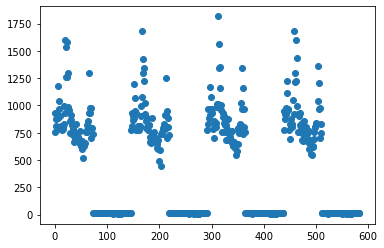

In [8]:
plt.plot(barris_new['Preu'], 'o')

Para mi sorpresa, observo que hay dos grupos de datos claramente segregados: un grupo de precios "altos" (500 - 1800) y un grupo de precios "bajos" (alrededor de 0). Además, la distribución a lo largo del dataset es alternante. 

Me imagino que es posible que estén reflejando dos tipos de precios distintos, así que recurro al dataset para ver qué sucede:

In [9]:
print(barris_new['Lloguer_mitja'].value_counts())

Lloguer mitjà mensual (Euros/mes)              270
Lloguer mitjà per superfície (Euros/m2 mes)    270
Name: Lloguer_mitja, dtype: int64


Efectivamente! Tenemos dos tipos de alquileres distintos en este mismo dataset. Decido proceder tan solo con los alquileres mensuales, así que creo un nuevo subdataset:

In [10]:
Barris_mes = barris_new[(barris_new["Lloguer_mitja"] == 'Lloguer mitjà mensual (Euros/mes)')]
print(Barris_mes.shape[0])
print(Barris_mes['Lloguer_mitja'].value_counts())

270
Lloguer mitjà mensual (Euros/mes)    270
Name: Lloguer_mitja, dtype: int64


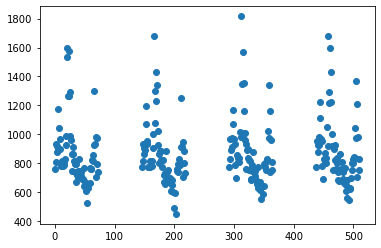

In [11]:
plt.plot(Barris_mes['Preu'], 'o')

## 2. Visualización de una variable categórica - DISTRITOS 

Prosigo realizando una visualización simple de la variable Distritos. Para ello lo que haré simplemente es reflejar un "contaje" de las veces que aparece cada distrito

<AxesSubplot:>

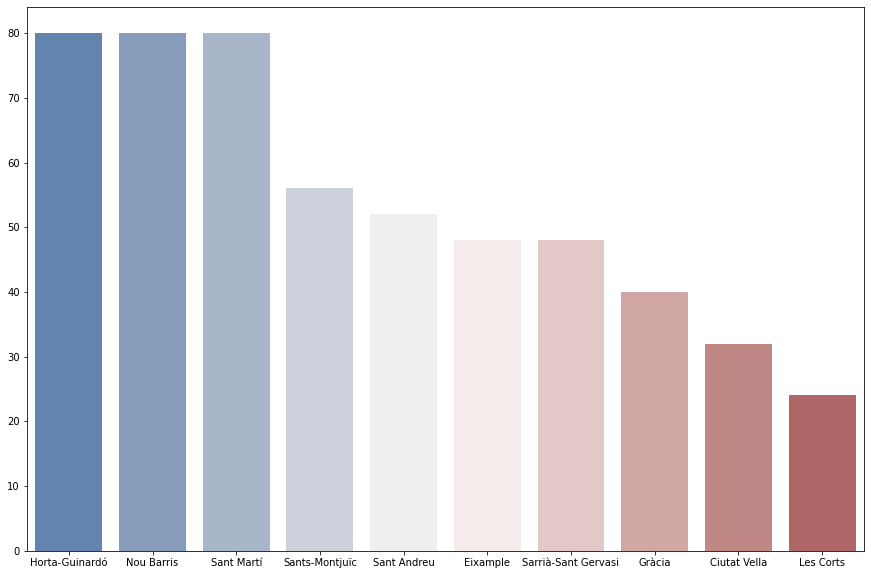

In [12]:
Distritos = barris_new['Nom_Districte'].value_counts().index #Variable nombre de distrito - basada en contaje del índice
num_dist = barris_new['Nom_Districte'].value_counts().values #Variable número de distritos

plt.figure(figsize=(15,10)) #Deternmino el tamaño de la figura
sns.barplot(x=Distritos, y=num_dist, palette="vlag") #Utilizo Seaborn, ya que me permite usar con facilidad paletas en los bar plots


Y aquí tenemos un barplot que nos muestra la cantidad de registros que corresponden a cada distrito. La diferencia seguramente refleja la cantidad de barrios que tenemos en cada uno de ellos

## 3. Visualización de una variable numérica y categórica - DISTRITO Y PRECIO

Empezamos a hacer cosas algo más complejas. Usaré un gráfico de "boxplot" para visualizar estos datos. Además, me parece interesante comparar el dataset completo (alquileres mensuales y por metro) y el filtrado (alquileres mensuales)

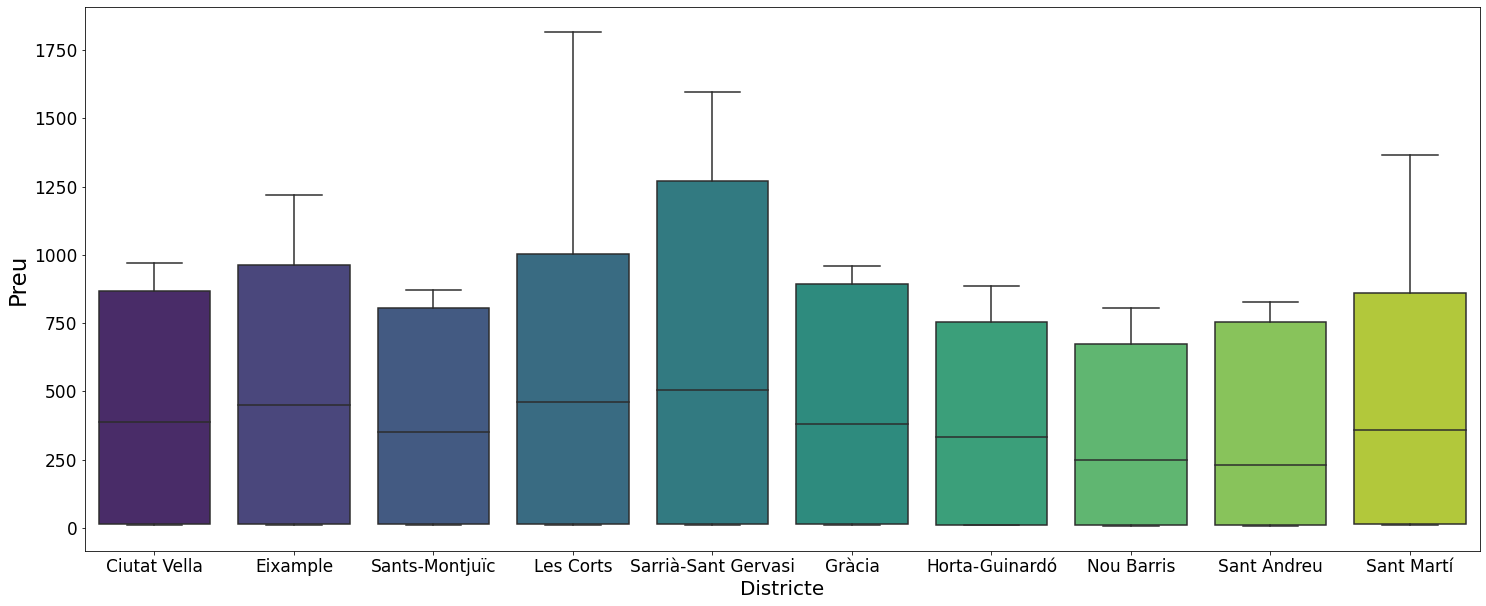

In [13]:
plt.figure(figsize=(25,10)) #Tamaño figura
a=sns.boxplot(x='Nom_Districte', y='Preu', data=barris_new, palette="viridis") #Gráfico inicial; Uso paleta viridis
a.set_xlabel("Districte",fontsize=20) #Aumento tamaño de las letras de los ejes
a.set_ylabel("Preu", fontsize=23)
a.tick_params(labelsize=17)
plt.show()

Como puede observarse, si no hubieramos detectado la tipología de los datos, aquí no estaríamos viendo nada interesante. Sin embargo, si usamos el datset filtrado:

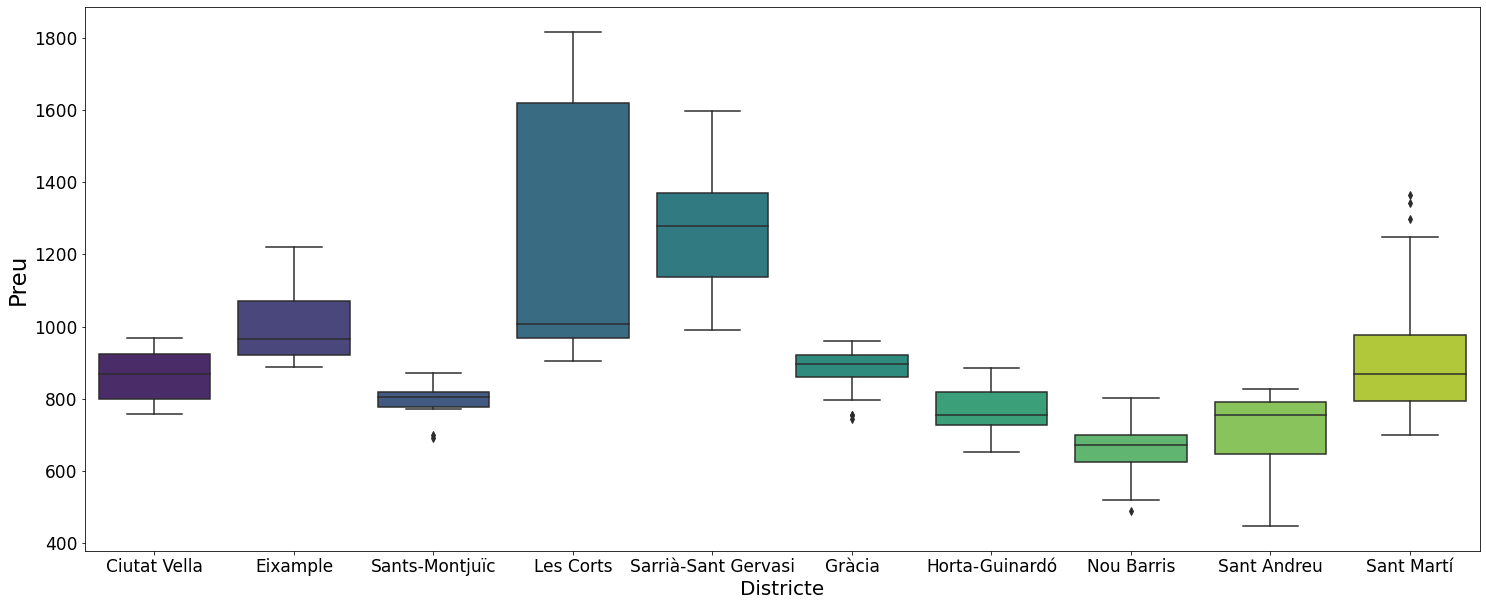

In [14]:
plt.figure(figsize=(25,10))
a=sns.boxplot(x='Nom_Districte', y='Preu', data=Barris_mes, palette="viridis")
a.set_xlabel("Districte",fontsize=20)
a.set_ylabel("Preu", fontsize=23)
a.tick_params(labelsize=17)
plt.show()

Observamos claras diferencias! En concreto, en este gráfico se puede apreciar con claridad la diferencia de precios que existen dependiendo del distrito. Los precios más altos los encontramos en Sarrià y en Les Corts (cabe destacar la aparente variabilidad existente en el distrito de les Corts: es probable que entre barrios de este distrito haya bastante diferencia). Los alquileres más bajos están en Nou Barris.

## 3. Visualización de dos variables numéricas - TRIMESTRE Y PRECIO

Un tipo de gráfico que podría usarse bien para graficar dos variables numéricas es un **scatterplot**. Veamos cómo hacerlo:

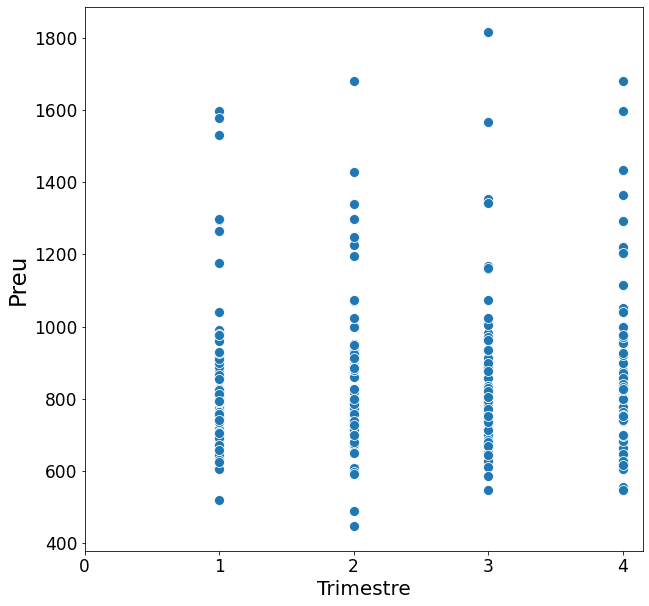

In [15]:
plt.figure(figsize=(10,10))

d_x = [1,2,3,4,5] #Para que los ticks del eje X salgan correctamente

d=sns.scatterplot(x='Trimestre', y='Preu', data=Barris_mes, s=100) #s= tamaño de los puntos
d.set_xlabel("Trimestre",fontsize=20)
d.set_xticks(range(len(d_x)))
d.set_ylabel("Preu", fontsize=23)
d.tick_params(labelsize=17)
plt.show()

Observamos que al tratarse de valores discretos, acabamos teniendo una distribución similar a la que tendríamos si se tratara de una variable categórica. Veamos cómo se vería si usaramos un boxplot:

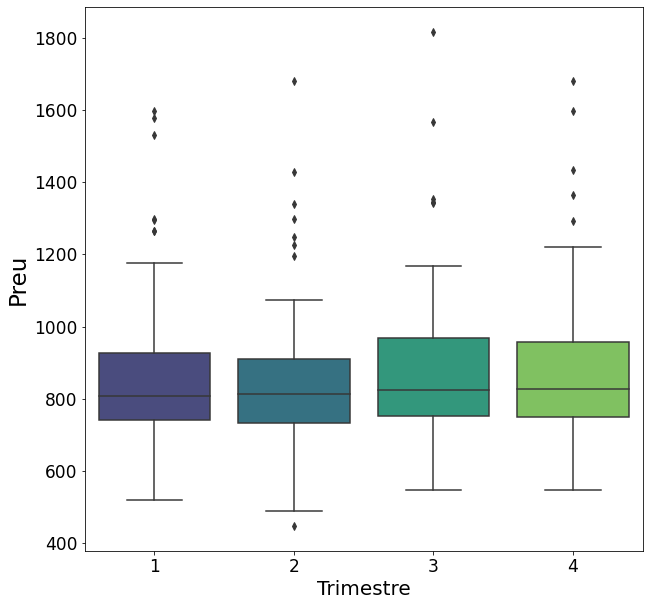

In [16]:
plt.figure(figsize=(10,10))
a=sns.boxplot(x='Trimestre', y='Preu', data=Barris_mes, palette="viridis")
a.set_xlabel("Trimestre",fontsize=20)
a.set_ylabel("Preu", fontsize=23)
a.tick_params(labelsize=17)
plt.show()

Mejor! Aparentemente, no se observan diferencias grandes entre los distintos trimestres

## 3. Visualización de tres variables (Distrito, Trimestre i Precio)

Pasemos a combinar las tres variables. En este tipo de visualización, el reto será poder ver los resultados con claridad y que el gráfico resulte estético. Propongo varias posibilidades:

<Figure size 72x720 with 0 Axes>

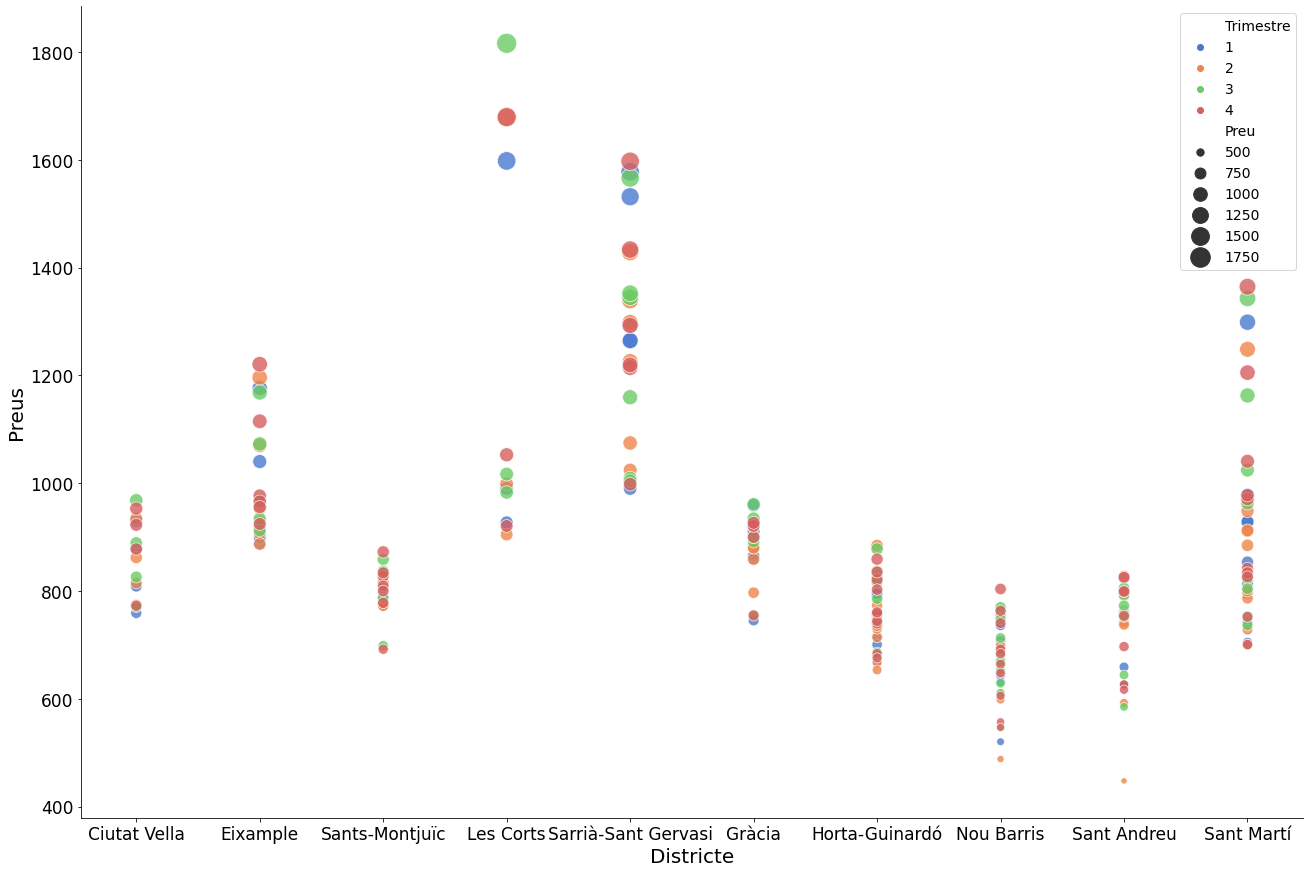

In [17]:
plt.figure(figsize=(1,10))
b=sns.relplot(x="Nom_Districte", y="Preu", hue="Trimestre", size="Preu",
            sizes=(40, 400), alpha=.8, palette="muted",
            height=12, aspect=1.5, data=Barris_mes)
b._legend.remove() #Quito leyenda para poder editarla luego
plt.ylabel("Preus", fontsize=20)
plt.xlabel("Districte", fontsize=20)
plt.tick_params(labelsize=17)
plt.legend(loc='upper right', fontsize='14', title_fontsize='18') #Añado leyenda
plt.show()

En esta primera opción, uso "relplot". Este tipo de función devuelve un objeto distinto (Facetgrid) así que los métodos de graficado son algo distintos.

En general, los resultados se ven bien, pero decido probar otro tipo de visualizaciones, ya que el solapamiento entre círculos hace difícil apreciar diferencias entre trimestres.

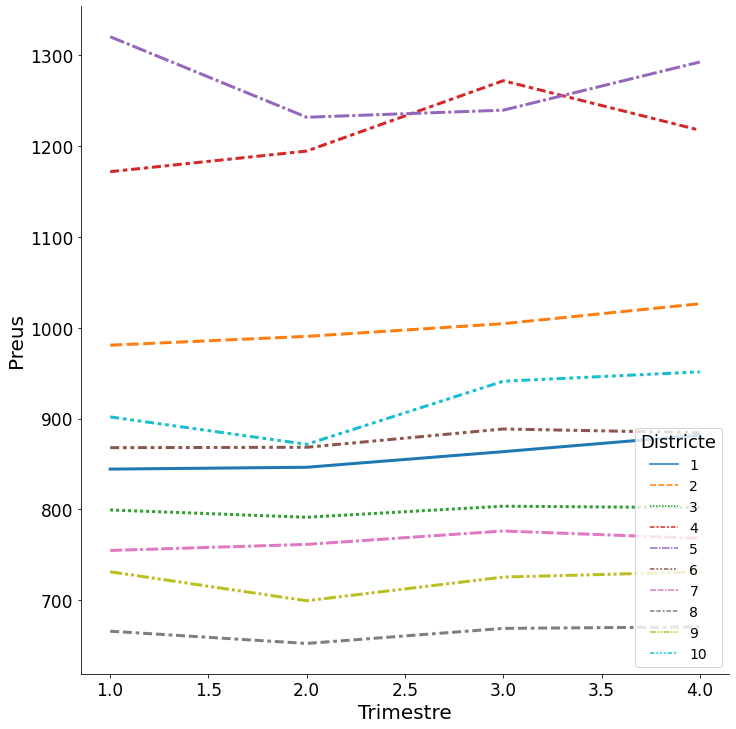

In [18]:
pruebita = Barris_mes.pivot_table("Preu", "Trimestre", "Codi_Districte") #Reestructuro los datos; En este caso, uso el código de los distritos, para que salga mejor la leyenda

a=sns.relplot(data=pruebita, kind="line",linewidth = 3, height=10)
a._legend.remove()
plt.ylabel("Preus", fontsize=20)
plt.xlabel("Trimestre", fontsize=20)
plt.tick_params(labelsize=17)
plt.legend(loc='lower right',title='Districte', fontsize='14', title_fontsize='18')
plt.show(a)

Este tipo de visualización, algo distinta a la anterior, permite ver mejor diferencias entre trimestres y distritos: Como ya veíamos, parece que en general no hay cambios aparentes entre los trimestres. No obstante, destaca que las mayores fluctuaciones de precios parecen producirse en los distritos más caros.

Para finalizar, pruebo una última visualización similar a esta última:

<Figure size 1800x720 with 0 Axes>

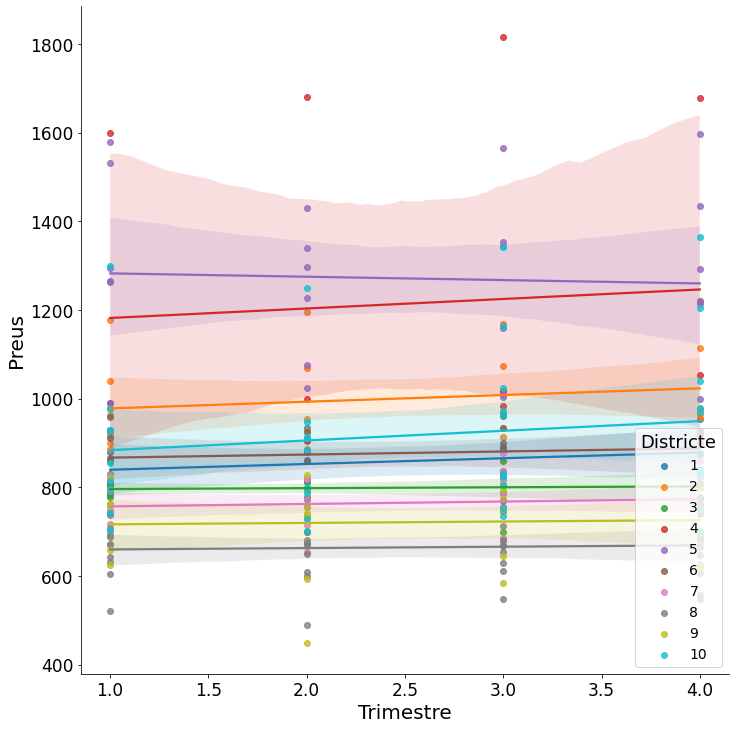

In [19]:
plt.figure(figsize=(25,10))
c= sns.lmplot(
    data=Barris_mes,
    x="Trimestre", y="Preu", hue="Codi_Districte",
    height=10
)
c._legend.remove()
plt.ylabel("Preus", fontsize=20)
plt.xlabel("Trimestre", fontsize=20)
plt.tick_params(labelsize=17)
plt.legend(loc='lower right',title='Districte', fontsize='14', title_fontsize='18')
plt.show(c)

La ventaja de este último plot es que aparecen también los puntos individuales para cada uno de los distritos: así mismo, la sombra alrededor de las líneas refleja la varianza que tenemos dentro de cada distrito

# Ejercicio 2. Exportar los gráficos

No me extenderé mucho en este apartado: Para exportar los gráficos como "png" por ejemplo, la manera más secilla es hacer uso de plt.savefig('figura.png').

A continuación podré un ejemplo con una de las figuras anteriores. Lo usual sería ir guardando a medida que vamos haciendo el código

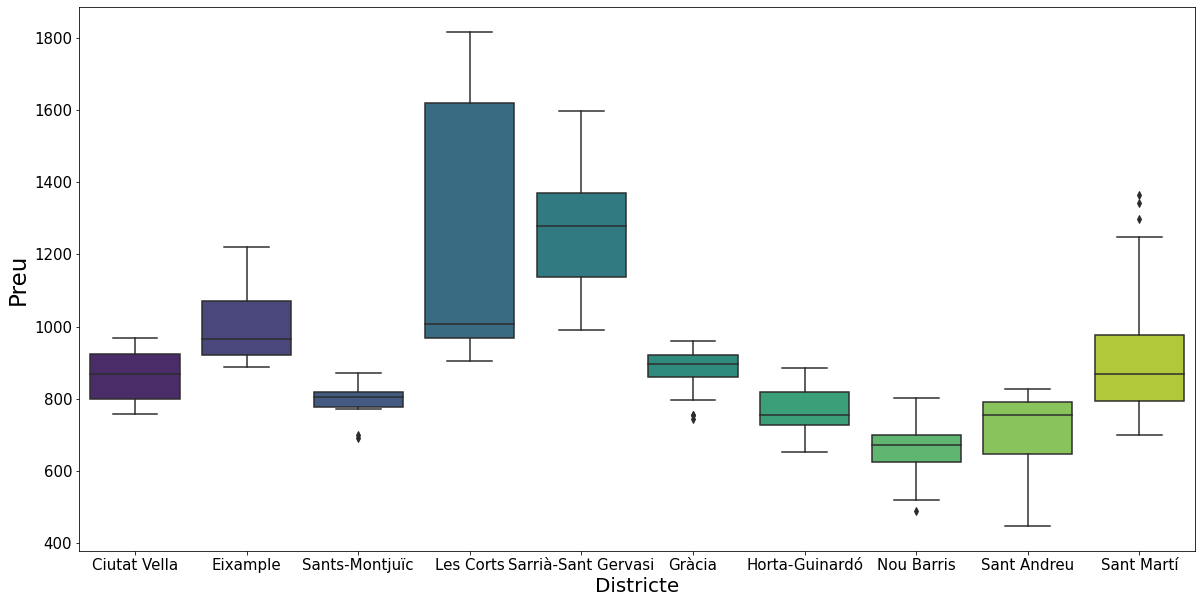

In [38]:
fig=plt.figure(figsize=(20,10))
fig=sns.boxplot(x='Nom_Districte', y='Preu', data=Barris_mes, palette="viridis")
fig.set_xlabel("Districte",fontsize=20)
fig.set_ylabel("Preu", fontsize=23)
fig.tick_params(labelsize=15)

plt.savefig('figura_Raquel.png', bbox_inches='tight', facecolor='white') #La figura se encuentra adjunta en el mismo repositorio de github

Pequeñas cosas a comentar:

**1.** A veces puede ser complicado que al guardar aparezcan los ejes: para ello, está bien establecer el parámetro bbox_inches

**2.** También puede ser que aparezcan los ejes de un color distinto. Para solucionarlo, establecemos el parámetro facecolor. 